<a href="https://colab.research.google.com/github/bijaytechis/Person_classification_Techis/blob/main/TechIS_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Final_data-20201227T190627Z-001.zip" -d "/content/drive/My Drive/"

unzip:  cannot find or open /content/drive/MyDrive/Final_data-20201227T190627Z-001.zip, /content/drive/MyDrive/Final_data-20201227T190627Z-001.zip.zip or /content/drive/MyDrive/Final_data-20201227T190627Z-001.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Final_data/Train'
valid_path = '/content/drive/MyDrive/Final_data/Test'

In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:

# useful for getting number of output classes
folders = glob( '/content/drive/MyDrive/Final_data/Train/*')
folders

['/content/drive/MyDrive/Final_data/Train/Raghu',
 '/content/drive/MyDrive/Final_data/Train/Prerana',
 '/content/drive/MyDrive/Final_data/Train/Erica',
 '/content/drive/MyDrive/Final_data/Train/Krishna',
 '/content/drive/MyDrive/Final_data/Train/Jimmy',
 '/content/drive/MyDrive/Final_data/Train/Keshav',
 '/content/drive/MyDrive/Final_data/Train/Sudaarsham',
 '/content/drive/MyDrive/Final_data/Train/Suru',
 '/content/drive/MyDrive/Final_data/Train/Edwin',
 '/content/drive/MyDrive/Final_data/Train/Mansi',
 '/content/drive/MyDrive/Final_data/Train/Himansu',
 '/content/drive/MyDrive/Final_data/Train/manthan',
 '/content/drive/MyDrive/Final_data/Train/Moeto',
 '/content/drive/MyDrive/Final_data/Train/kshiteesh',
 '/content/drive/MyDrive/Final_data/Train/Varsha',
 '/content/drive/MyDrive/Final_data/Train/Anna',
 '/content/drive/MyDrive/Final_data/Train/Priya',
 '/content/drive/MyDrive/Final_data/Train/Ankit',
 '/content/drive/MyDrive/Final_data/Train/Aishwarya',
 '/content/drive/MyDrive/Fina

In [ ]:
len(folders)

23

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2200 images belonging to 23 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2190 images belonging to 23 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
69/69 [==============================] - 2469s 36s/step - loss: 2.0717 - accuracy: 0.5143 - val_loss: 0.3375 - val_accuracy: 0.9260
Epoch 2/20
69/69 [==============================] - 36s 517ms/step - loss: 0.1480 - accuracy: 0.9807 - val_loss: 0.3146 - val_accuracy: 0.9265
Epoch 3/20
69/69 [==============================] - 36s 521ms/step - loss: 0.1041 - accuracy: 0.9804 - val_loss: 0.2711 - val_accuracy: 0.9196
Epoch 4/20
69/69 [==============================] - 35s 506ms/step - loss: 0.0672 - accuracy: 0.9876 - val_loss: 0.2165 - val_accuracy: 0.9557
Epoch 5/20
69/69 [==============================] - 35s 503ms/step - loss: 0.0436 - accuracy: 0.9930 - val_loss: 0.2462 - val_accuracy: 0.9324
Epoch 6/20
69/69 [==============================] - 35s 501ms/step - loss: 0.0461 - accuracy: 0.9873 - val_loss: 0.2119 - val_accuracy: 0.9530
Epoch 7/20
69/69 [==============================] - 34s 500ms/step - loss: 0.0412 - accuracy: 0.9898 - val_loss: 0.2013 - val_accuracy: 0.9530

Textual History  yet to be Decided.

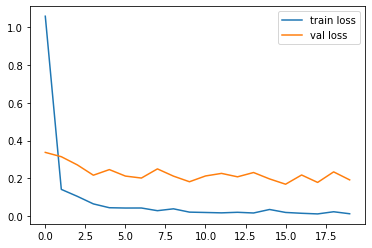

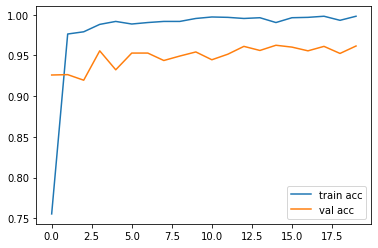

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg16_techis_ImageClassification.h5')

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

NameError: ignored